In [51]:
# —Ç–µ–º–∞ –ø—Ä–æ–µ–∫—Ç–∞ "–†–∞–∑–≤–∏—Ç–∏–µ —Ö–∏–ø-—Ö–æ–ø –∫—É–ª—å—Ç—É—Ä—ã –≤ —Ä–µ—Å–ø—É–±–ª–∏–∫–µ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω –∏ –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏"

In [29]:
import vk  

In [30]:
import re

In [31]:
token = "" 
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

In [32]:
personal_token = ""
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)  

In [33]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  
    data = first["items"]  
    count = first["count"] // 1000  
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [34]:
members = get_members ("aigelmusic")

In [35]:
aigelmusic_members = get_members ("aigelmusic")
len(aigelmusic_members)

35623

In [36]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1: 
                sex = "F"  
            elif int(sex) == 2:  
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [37]:
save_members_to_file ("aigelmusic_savemembers.tsv", members)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import pandas as pd

df = pd.read_csv("aigelmusic_savemembers.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [40]:
df.head(10)

id       name        surname sex birth              city  country
0    364,     Albert  Alexandrovich   M     -  Saint Petersburg   Russia
1    636,  Alexander        Belyaev   M  1989           Pushkin   Russia
2   2950,    Evgenya      Kovalchuk   F     -                 -        -
3   5674,      Vasya       Ugryumov   M     -  Saint Petersburg   Russia
4   6873,      Yulia      Krishneva   F     -                 -        -
5   8001,       Inga        Petrova   F     -              K√∂ln  Germany
6   9968,      Denis        Morozov   M     -  Saint Petersburg   Russia
7  10254,    DELETED            NaN   M     -                 -        -
8  11345,      Maxim       Stepakov   M     -            Moscow   Russia
9  11782,      Alisa         Kobzun   F     -  Saint Petersburg   Russia

In [23]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 

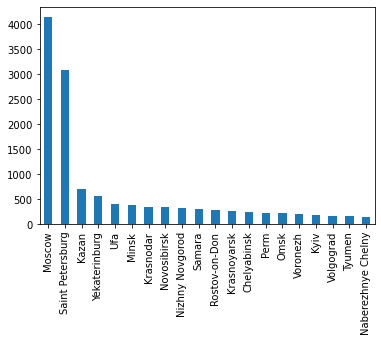

In [24]:
city_count.plot.bar() 
plt.show() 

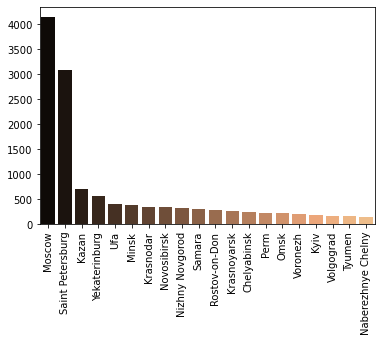

In [25]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.xticks(rotation=90) 
plt.show() 

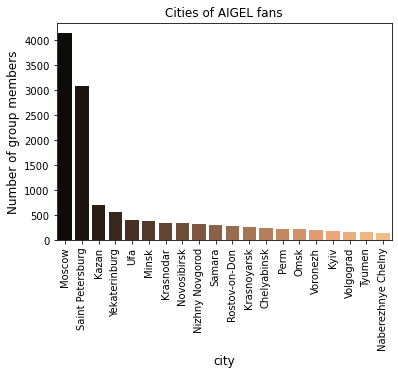

In [26]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.title('Cities of AIGEL fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

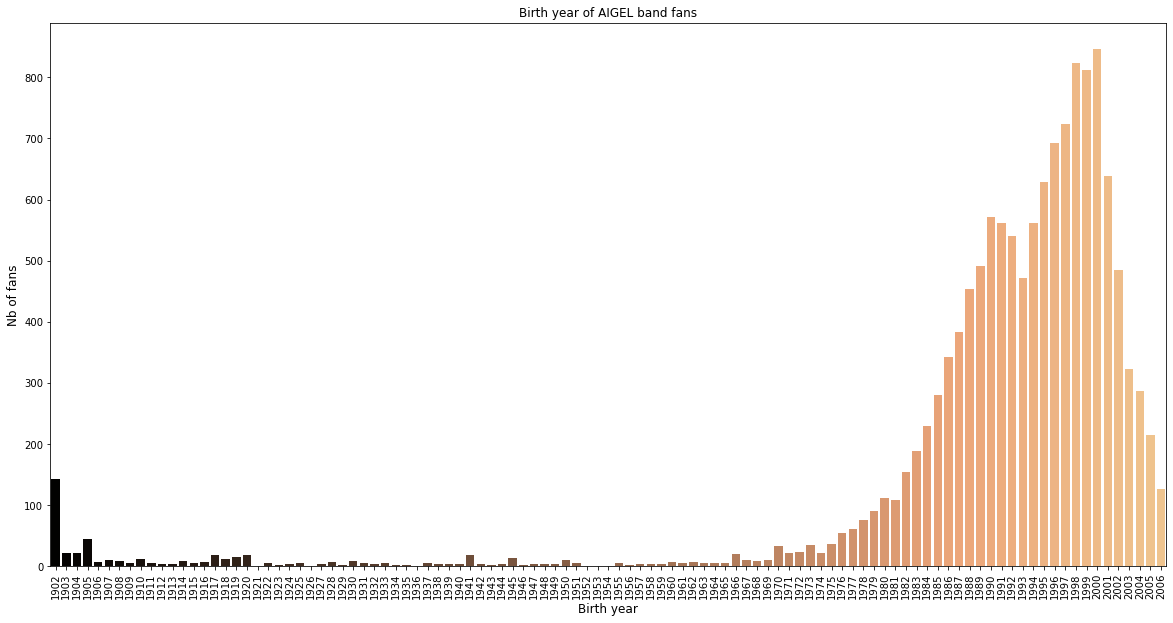

In [41]:
birth_count  = df['birth'].value_counts().drop('-')
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count.index, birth_count.values, palette='copper') 
plt.title('Birth year of AIGEL band fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

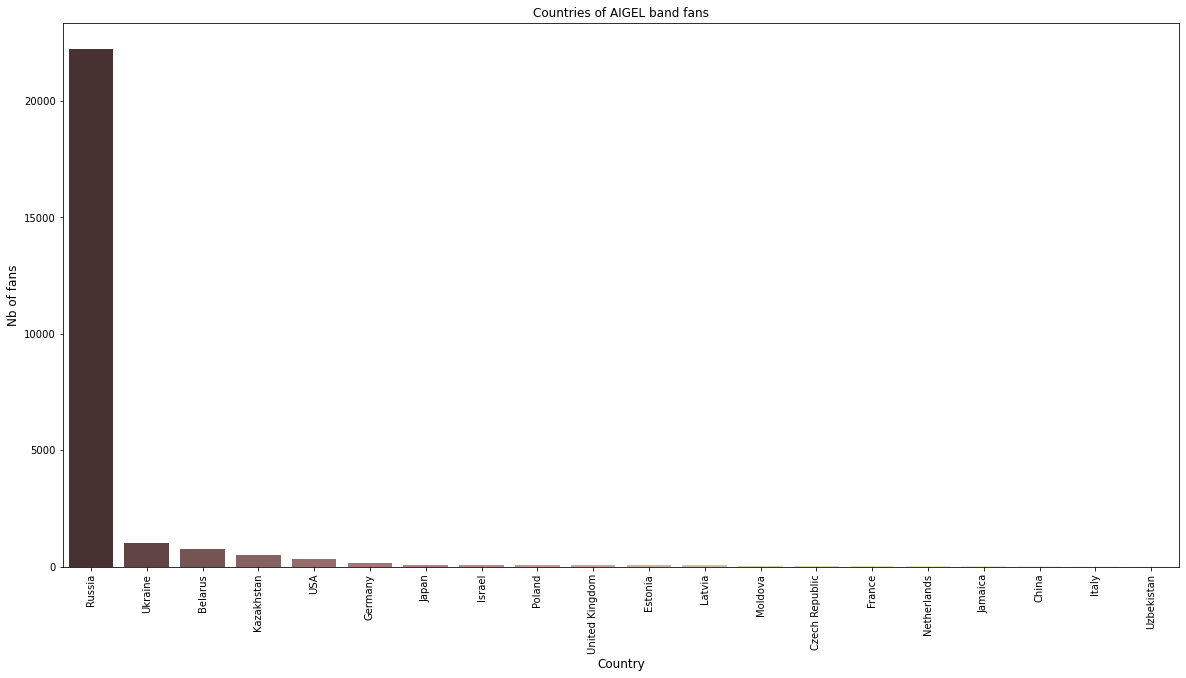

In [28]:
country_count = df["country"].value_counts().drop("-")
country_count = country_count [0:20]
plt.figure(figsize=(20,10))
ax = sns.barplot(country_count.index,country_count.values, palette="pink")
plt.title("Countries of AIGEL band fans")
plt.ylabel("Nb of fans", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [45]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Kazan')] = "msk + kzn"
df.loc[(df['city'] != "msk + kzn") & (df['city'] != "-")] = "province"

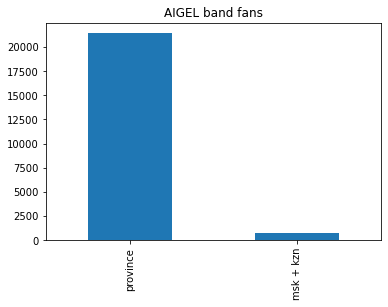

In [46]:
city_count  = df['city'].value_counts().drop('-') 
plt.title("AIGEL band fans")
city_count = city_count[:20] 
axes = city_count.plot.bar() 

In [43]:
new_df = df[df['sex'].ne('-')] 
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') 

<ipython-input-43-4f4bd87b4777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce')


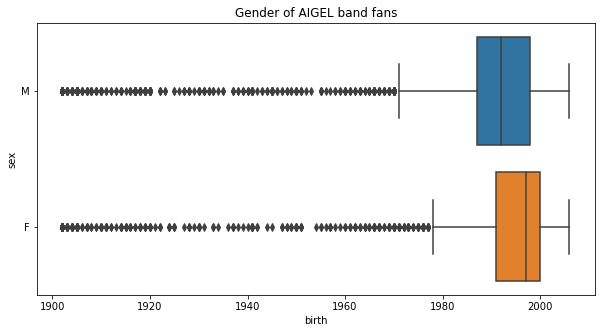

In [44]:
plt.figure(figsize=(10,5)) 
plt.title('Gender of AIGEL band fans')
sns.boxplot(x="birth", y="sex", data=new_df) 
plt.show()

In [19]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100  
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [20]:
aigelmusic_posts=get_posts("aigelmusic")

In [21]:
for post in aigelmusic_posts[:10]:
    print (post)

–ü—Ä–µ–º—å–µ—Ä–∞!
–ê–ò–ì–ï–õ ‚Äî EP ¬´–û—Ñ–∏–≥–µ–Ω–Ω–æ¬ª 

–°–ª—É—à–∞—Ç—å –≤–µ–∑–¥–µ: aplusmuz.ru/albums/aigel-ofigenno/

Mastered: [id52310062|Aleks]
Design: [id80170169|Max Kuzhegetov]

–°–µ–≥–æ–¥–Ω—è –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É –Ω–∞—à–µ–≥–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞ [id80170169|–ú–∞–∫—Å–∞ –ö—É–∂–µ–≥–µ—Ç–æ–≤–∞]!

–ú—ã —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∏ –æ —Ç–æ–º, —Å–∫–æ–ª—å–∫–æ [https://vk.com/wall-142108710_6739|–∫–ª–∞—Å—Å–Ω—ã—Ö –æ–±–ª–æ–∂–µ–∫] –æ–Ω —Å–¥–µ–ª–∞–ª –¥–ª—è –Ω–∞—Å. –ò –º—ã —Å–∫–∞–∂–µ–º –æ–± —ç—Ç–æ–º —Å–Ω–æ–≤–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –ú–∞–∫—Å ‚Äî –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ–π –¥–∏–∑–∞–π–Ω–µ—Ä –∏ –Ω–∞—à –¥—Ä—É–≥!

–ú–∞–∫—Å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è, –æ—Ñ–∏–≥–µ–Ω–Ω–æ, —á—Ç–æ —Ç—ã —Å –Ω–∞–º–∏ üñ§
–ê–π–≥–µ–ª—å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è! üñ§
–£ –Ω–∞—Å –¥–≤–µ –Ω–æ–≤–æ—Å—Ç–∏. 

‚Äî –ö–æ–Ω—Ü–µ—Ä—Ç –≤ –ü—Ä–∞–≥–µ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç—Å—è –Ω–∞ 18 —Ñ–µ–≤—Ä–∞–ª—è 2021 –≥–æ–¥–∞
‚Äî –ù–æ —É–∂–µ —Å–µ–≥–æ–¥–Ω—è –≤ 20:00 –º—ã –ø—Ä–æ–≤–µ–¥—ë–º –ø—Ä—è–º–æ–π —ç—Ñ–∏—Ä –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ DOX –≤ Facebook, –ø–

In [22]:
print (aigelmusic_posts)

['–ü—Ä–µ–º—å–µ—Ä–∞!\n–ê–ò–ì–ï–õ ‚Äî EP ¬´–û—Ñ–∏–≥–µ–Ω–Ω–æ¬ª \n\n–°–ª—É—à–∞—Ç—å –≤–µ–∑–¥–µ: aplusmuz.ru/albums/aigel-ofigenno/\n\nMastered: [id52310062|Aleks]\nDesign: [id80170169|Max Kuzhegetov]', '', '–°–µ–≥–æ–¥–Ω—è –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É –Ω–∞—à–µ–≥–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞ [id80170169|–ú–∞–∫—Å–∞ –ö—É–∂–µ–≥–µ—Ç–æ–≤–∞]!\n\n–ú—ã —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∏ –æ —Ç–æ–º, —Å–∫–æ–ª—å–∫–æ [https://vk.com/wall-142108710_6739|–∫–ª–∞—Å—Å–Ω—ã—Ö –æ–±–ª–æ–∂–µ–∫] –æ–Ω —Å–¥–µ–ª–∞–ª –¥–ª—è –Ω–∞—Å. –ò –º—ã —Å–∫–∞–∂–µ–º –æ–± —ç—Ç–æ–º —Å–Ω–æ–≤–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –ú–∞–∫—Å ‚Äî –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ–π –¥–∏–∑–∞–π–Ω–µ—Ä –∏ –Ω–∞—à –¥—Ä—É–≥!\n\n–ú–∞–∫—Å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è, –æ—Ñ–∏–≥–µ–Ω–Ω–æ, —á—Ç–æ —Ç—ã —Å –Ω–∞–º–∏ üñ§', '–ê–π–≥–µ–ª—å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è! üñ§', '–£ –Ω–∞—Å –¥–≤–µ –Ω–æ–≤–æ—Å—Ç–∏. \n\n‚Äî –ö–æ–Ω—Ü–µ—Ä—Ç –≤ –ü—Ä–∞–≥–µ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç—Å—è –Ω–∞ 18 —Ñ–µ–≤—Ä–∞–ª—è 2021 –≥–æ–¥–∞\n‚Äî –ù–æ —É–∂–µ —Å–µ–≥–æ–¥–Ω—è –≤ 20:00 –º—ã –ø—Ä–æ–≤–µ–¥—ë–º –ø—Ä—è–º–æ–π —ç—Ñ–∏—Ä –Ω–∞ —Å—Ç—Ä–∞–Ω

In [23]:
aigelmusic = " "
for i in aigelmusic_posts:
    aigelmusic += str(i)
aigelmusic = re.sub('\[(id|club)\d*\|[–ê-–Ø–∞-—è A-Za-z0-9—ë–Å\-\,\@\(\)\"\'\:\¬´\¬ª\|\$\^\&\*\‚Äô\.\`]*\]', '', aigelmusic)

In [24]:
print (aigelmusic)

 –ü—Ä–µ–º—å–µ—Ä–∞!
–ê–ò–ì–ï–õ ‚Äî EP ¬´–û—Ñ–∏–≥–µ–Ω–Ω–æ¬ª 

–°–ª—É—à–∞—Ç—å –≤–µ–∑–¥–µ: aplusmuz.ru/albums/aigel-ofigenno/

Mastered: 
Design: –°–µ–≥–æ–¥–Ω—è –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É –Ω–∞—à–µ–≥–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞ !

–ú—ã —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∏ –æ —Ç–æ–º, —Å–∫–æ–ª—å–∫–æ [https://vk.com/wall-142108710_6739|–∫–ª–∞—Å—Å–Ω—ã—Ö –æ–±–ª–æ–∂–µ–∫] –æ–Ω —Å–¥–µ–ª–∞–ª –¥–ª—è –Ω–∞—Å. –ò –º—ã —Å–∫–∞–∂–µ–º –æ–± —ç—Ç–æ–º —Å–Ω–æ–≤–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –ú–∞–∫—Å ‚Äî –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ–π –¥–∏–∑–∞–π–Ω–µ—Ä –∏ –Ω–∞—à –¥—Ä—É–≥!

–ú–∞–∫—Å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è, –æ—Ñ–∏–≥–µ–Ω–Ω–æ, —á—Ç–æ —Ç—ã —Å –Ω–∞–º–∏ üñ§–ê–π–≥–µ–ª—å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è! üñ§–£ –Ω–∞—Å –¥–≤–µ –Ω–æ–≤–æ—Å—Ç–∏. 

‚Äî –ö–æ–Ω—Ü–µ—Ä—Ç –≤ –ü—Ä–∞–≥–µ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç—Å—è –Ω–∞ 18 —Ñ–µ–≤—Ä–∞–ª—è 2021 –≥–æ–¥–∞
‚Äî –ù–æ —É–∂–µ —Å–µ–≥–æ–¥–Ω—è –≤ 20:00 –º—ã –ø—Ä–æ–≤–µ–¥—ë–º –ø—Ä—è–º–æ–π —ç—Ñ–∏—Ä –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ DOX –≤ Facebook, –ø–æ–¥–∫–ª—é—á–∞–π—Ç–µ—Å—å: vk.cc/aAm3i7

üñ§–ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –∏—Å–∫–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–

In [25]:
pattern_link = re.compile(r"[A-z0-9]+[/.\/:]+[A-z0-9_]+[\.\/]+[A-z0-9]+[A-z1-9/\.]+\b")

In [26]:
print(re.sub(pattern_link, "WEBLINK", aigelmusic))

 –ü—Ä–µ–º—å–µ—Ä–∞!
–ê–ò–ì–ï–õ ‚Äî EP ¬´–û—Ñ–∏–≥–µ–Ω–Ω–æ¬ª 

–°–ª—É—à–∞—Ç—å –≤–µ–∑–¥–µ: WEBLINK-ofigenno/

Mastered: 
Design: –°–µ–≥–æ–¥–Ω—è –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É –Ω–∞—à–µ–≥–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞ !

–ú—ã —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∏ –æ —Ç–æ–º, —Å–∫–æ–ª—å–∫–æ WEBLINK-142108710_6739|–∫–ª–∞—Å—Å–Ω—ã—Ö –æ–±–ª–æ–∂–µ–∫] –æ–Ω —Å–¥–µ–ª–∞–ª –¥–ª—è –Ω–∞—Å. –ò –º—ã —Å–∫–∞–∂–µ–º –æ–± —ç—Ç–æ–º —Å–Ω–æ–≤–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –ú–∞–∫—Å ‚Äî –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ–π –¥–∏–∑–∞–π–Ω–µ—Ä –∏ –Ω–∞—à –¥—Ä—É–≥!

–ú–∞–∫—Å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è, –æ—Ñ–∏–≥–µ–Ω–Ω–æ, —á—Ç–æ —Ç—ã —Å –Ω–∞–º–∏ üñ§–ê–π–≥–µ–ª—å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è! üñ§–£ –Ω–∞—Å –¥–≤–µ –Ω–æ–≤–æ—Å—Ç–∏. 

‚Äî –ö–æ–Ω—Ü–µ—Ä—Ç –≤ –ü—Ä–∞–≥–µ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç—Å—è –Ω–∞ 18 —Ñ–µ–≤—Ä–∞–ª—è 2021 –≥–æ–¥–∞
‚Äî –ù–æ —É–∂–µ —Å–µ–≥–æ–¥–Ω—è –≤ 20:00 –º—ã –ø—Ä–æ–≤–µ–¥—ë–º –ø—Ä—è–º–æ–π —ç—Ñ–∏—Ä –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ DOX –≤ Facebook, –ø–æ–¥–∫–ª—é—á–∞–π—Ç–µ—Å—å: WEBLINK

üñ§–ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –∏—Å–∫–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —É–≤–∏–¥–µ—Ç—å—Å—è —Å –≤–∞–

In [27]:
def save_posts_to_file(filename, post):
    with open(filename, 'w', encoding="utf-8") as f:
        f.write(post) 
  

In [28]:
aigelmusic_posts = get_posts("aigelmusic")

save_posts_to_file("aigelmusic_posts.tsv", aigelmusic)

In [29]:
concert_counter = re.findall(r'–ö|–∫–æ–Ω—Ü–µ—Ä—Ç', aigelmusic)
print("–ö–æ–Ω—Ü–µ—Ä—Ç–æ–≤ —É Aigel:", len(concert_counter))

–ö–æ–Ω—Ü–µ—Ä—Ç–æ–≤ —É Aigel: 319


In [30]:
!pip install natasha

In [31]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding,
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [32]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb=NewsEmbedding()
morph_tagger=NewsMorphTagger(emb)
syntax_parser=NewsSyntaxParser(emb)
ner_tagger=NewsNERTagger(emb)
names_extractor=NamesExtractor(morph_vocab)

In [33]:
doc = Doc(aigelmusic)
doc.segment(segmenter)

In [34]:
[i.text for i in doc.sents]

['–ü—Ä–µ–º—å–µ—Ä–∞!',
 '–ê–ò–ì–ï–õ ‚Äî EP ¬´–û—Ñ–∏–≥–µ–Ω–Ω–æ¬ª \n\n–°–ª—É—à–∞—Ç—å –≤–µ–∑–¥–µ: aplusmuz.ru/albums/aigel-ofigenno/\n\nMastered: \nDesign: –°–µ–≥–æ–¥–Ω—è –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É –Ω–∞—à–µ–≥–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞ !',
 '–ú—ã —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∏ –æ —Ç–æ–º, —Å–∫–æ–ª—å–∫–æ [https://vk.com/wall-142108710_6739|–∫–ª–∞—Å—Å–Ω—ã—Ö –æ–±–ª–æ–∂–µ–∫] –æ–Ω —Å–¥–µ–ª–∞–ª –¥–ª—è –Ω–∞—Å.',
 '–ò –º—ã —Å–∫–∞–∂–µ–º –æ–± —ç—Ç–æ–º —Å–Ω–æ–≤–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –ú–∞–∫—Å ‚Äî –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ–π –¥–∏–∑–∞–π–Ω–µ—Ä –∏ –Ω–∞—à –¥—Ä—É–≥!',
 '–ú–∞–∫—Å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è, –æ—Ñ–∏–≥–µ–Ω–Ω–æ, —á—Ç–æ —Ç—ã —Å –Ω–∞–º–∏ üñ§–ê–π–≥–µ–ª—å, —Å –¥–Ω—ë–º —Ä–æ–∂–¥–µ–Ω–∏—è!',
 'üñ§–£ –Ω–∞—Å –¥–≤–µ –Ω–æ–≤–æ—Å—Ç–∏.',
 '‚Äî –ö–æ–Ω—Ü–µ—Ä—Ç –≤ –ü—Ä–∞–≥–µ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç—Å—è –Ω–∞ 18 —Ñ–µ–≤—Ä–∞–ª—è 2021 –≥–æ–¥–∞\n‚Äî –ù–æ —É–∂–µ —Å–µ–≥–æ–¥–Ω—è –≤ 20:00 –º—ã –ø—Ä–æ–≤–µ–¥—ë–º –ø—Ä—è–º–æ–π —ç—Ñ–∏—Ä –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ DOX –≤ Facebook, –ø–æ–¥–∫–ª—é—á–∞–π—Ç–µ—Å—å: vk.cc/aAm3i7\n\nüñ§–ü—Ä–æ–¥–æ–ª–∂–∞–µ–º

In [35]:
print([i.text for i in doc.tokens])

['–ü—Ä–µ–º—å–µ—Ä–∞', '!', '–ê–ò–ì–ï–õ', '‚Äî', 'EP', '¬´', '–û—Ñ–∏–≥–µ–Ω–Ω–æ', '¬ª', '–°–ª—É—à–∞—Ç—å', '–≤–µ–∑–¥–µ', ':', 'aplusmuz', '.', 'ru', '/', 'albums', '/', 'aigel-ofigenno', '/', 'Mastered', ':', 'Design', ':', '–°–µ–≥–æ–¥–Ω—è', '–¥–µ–Ω—å', '—Ä–æ–∂–¥–µ–Ω–∏—è', '—É', '–Ω–∞—à–µ–≥–æ', '–¥–∏–∑–∞–π–Ω–µ—Ä–∞', '!', '–ú—ã', '—É–∂–µ', '–≥–æ–≤–æ—Ä–∏–ª–∏', '–æ', '—Ç–æ–º', ',', '—Å–∫–æ–ª—å–∫–æ', '[', 'https', ':', '/', '/', 'vk', '.', 'com', '/', 'wall-142108710_6739', '|', '–∫–ª–∞—Å—Å–Ω—ã—Ö', '–æ–±–ª–æ–∂–µ–∫', ']', '–æ–Ω', '—Å–¥–µ–ª–∞–ª', '–¥–ª—è', '–Ω–∞—Å', '.', '–ò', '–º—ã', '—Å–∫–∞–∂–µ–º', '–æ–±', '—ç—Ç–æ–º', '—Å–Ω–æ–≤–∞', ',', '–ø–æ—Ç–æ–º—É', '—á—Ç–æ', '–ú–∞–∫—Å', '‚Äî', '–æ—á–µ–Ω—å', '–∫—Ä—É—Ç–æ–π', '–¥–∏–∑–∞–π–Ω–µ—Ä', '–∏', '–Ω–∞—à', '–¥—Ä—É–≥', '!', '–ú–∞–∫—Å', ',', '—Å', '–¥–Ω—ë–º', '—Ä–æ–∂–¥–µ–Ω–∏—è', ',', '–æ—Ñ–∏–≥–µ–Ω–Ω–æ', ',', '—á—Ç–æ', '—Ç—ã', '—Å', '–Ω–∞–º–∏', 'üñ§–ê–π–≥–µ–ª—å', ',', '—Å', '–¥–Ω—ë–º', '—Ä–æ–∂–¥–µ–Ω–∏—è', '!', 'üñ§–£', '–Ω–∞—Å', '–¥–≤–µ', '–Ω–æ–≤–æ—Å—Ç–∏'

In [36]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [37]:
print([i.lemma for i in doc.tokens])

['–ø—Ä–µ–º—å–µ—Ä–∞', '!', '–∞–∏–≥–µ–ª', '‚Äî', 'ep', '¬´', '–æ—Ñ–∏–≥–µ–Ω–Ω—ã–π', '¬ª', '—Å–ª—É—à–∞—Ç—å', '–≤–µ–∑–¥–µ', ':', 'aplusmuz', '.', 'ru', '/', 'albums', '/', 'aigel-ofigenno', '/', 'mastered', ':', 'design', ':', '—Å–µ–≥–æ–¥–Ω—è', '–¥–µ–Ω—å', '—Ä–æ–∂–¥–µ–Ω–∏–µ', '—É', '–Ω–∞—à', '–¥–∏–∑–∞–π–Ω–µ—Ä', '!', '–º—ã', '—É–∂–µ', '–≥–æ–≤–æ—Ä–∏—Ç—å', '–æ', '—Ç–æ—Ç', ',', '—Å–∫–æ–ª—å–∫–æ', '[', 'https', ':', '/', '/', 'vk', '.', 'com', '/', 'wall-142108710_6739', '|', '–∫–ª–∞—Å—Å–Ω—ã–π', '–æ–±–ª–æ–∂–∫–∞', ']', '–æ–Ω', '—Å–¥–µ–ª–∞—Ç—å', '–¥–ª—è', '–º—ã', '.', '–∏', '–º—ã', '—Å–∫–∞–∑–∞—Ç—å', '–æ', '—ç—Ç–æ', '—Å–Ω–æ–≤–∞', ',', '–ø–æ—Ç–æ–º—É', '—á—Ç–æ', '–º–∞–∫—Å', '‚Äî', '–æ—á–µ–Ω—å', '–∫—Ä—É—Ç–æ–π', '–¥–∏–∑–∞–π–Ω–µ—Ä', '–∏', '–Ω–∞—à', '–¥—Ä—É–≥', '!', '–º–∞–∫—Å', ',', '—Å', '–¥–µ–Ω—å', '—Ä–æ–∂–¥–µ–Ω–∏–µ', ',', '–æ—Ñ–∏–≥–µ–Ω–Ω–æ', ',', '—á—Ç–æ', '—Ç—ã', '—Å', '–º—ã', 'üñ§–∞–π–≥–µ–ª—å', ',', '—Å', '–¥–µ–Ω—å', '—Ä–æ–∂–¥–µ–Ω–∏–µ', '!', 'üñ§—É', '–º—ã', '–¥–≤–∞', '–Ω–æ–≤–æ—Å—Ç—å', '.', '‚Äî', 

In [38]:
doc.tag_ner(ner_tagger)

In [39]:
locations = set()
persons = set()
organizations = set()

with open("aigelmusic_posts.tsv", 'r', encoding="utf-8") as f:
    for line in f:
        text = line.strip()
        
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [40]:
print(locations) #Aigel

{'–ú–æ—Å–∫–≤–∞', '–¢—é–º–µ–Ω—å', '–õ–æ—Å-–ê–Ω–¥–∂–µ–ª–µ—Å', '–°–®–ê', '–†—è–∑–∞–Ω—å', '–ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥', '–ú–∞—è—Ç–Ω–∏–∫ –§—É–∫–æ', '–†–∏–≥–∞', '–ö–∞–∑–∞–Ω—Å–∫–∏–π (–ü—Ä–∏–≤–æ–ª–∂—Å–∫–∏–π) —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω—ã–π —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç', '–ß—É–≤–∞—à–∏—è', '–¢—É–ª–∞', '–ü—Ä–∞–≥–∞', '–ê—É–¥–∏–æ–≤–µ—Ä—Å–∏—è', '–í–∞—Ä—à–∞–≤–∞', '–ú—É—Ä–æ–º—Ü–µ–≤—Å–∫–æ–≥–æ', '–•–ú–ê–û', '–õ–µ–º–æ–Ω–¥—ç–π', '–ö–∞–Ω–Ω–∞—Ö', 'TatCultFest)', '–ö–∞–ª–∏–Ω–∏–Ω–≥—Ä–∞–¥', '–ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫', '–Ø–ù–ê–û', '–ù–∏–∂–Ω–∏–π', '–í–æ—Ä–æ–Ω–µ–∂', '–ü–∏—Ç–µ—Ä', '–¢–µ—Ö–Ω–æ–ª–æ–∂–∫–∏', '–ë—É—ç–Ω–æ—Å-–ê–π—Ä–µ—Å', '–ó–∞–µ–ª—å—Ü–æ–≤—Å–∫–æ–µ –∫–ª–∞–¥–±–∏—â–µ', '–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥', '–ü–µ–Ω–∑–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ú–ò–ù–°–ö', '–õ–∏—Ç–≤–∞', '–î–∂–µ–º–±–∞—Ä', '–•–∞—Ä—å–∫–æ–≤', '–ì–∞–≤–∞–Ω—å', '–ü–µ—Ç–µ—Ä–±—É—Ä–≥', 'Son Luxüòç', '–¢—ã–≤–∞', '–°–∞—Ö–∞–ª–∏–Ω', '–¢–∞–ª–ª–∏–Ω', '–£–ª—å—è–Ω–æ–≤—Å–∫', '–¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω', '–†–æ–¥–Ω–µüíÄ', '–£—Å—Ç—å-–ò—à–∏–º—Å–∫–æ–≥–æ –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω—ã–µ —Ä–∞–π